### I used these url's as guides to implement this

##### http://datanongrata.com/2019/04/27/67/
##### https://nbviewer.jupyter.org/gist/vals/150ec97a5b7db9c82ee9
##### https://plotly.com/python/3d-scatter-plots/

In [52]:
from collections import defaultdict
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib.colors import rgb2hex, colorConverter
from scipy.cluster.hierarchy import set_link_color_palette
import pandas as pd
import scipy.cluster.hierarchy as sch
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [53]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9

In [54]:
import seaborn as sns
sns.set_style("whitegrid")

In [71]:
etf_data = pd.read_csv('ETFs.csv')
stock_data = pd.read_csv('stocks.csv')

stock_data_new = stock_data[["symbol","trades","price","ADV_3months_lvl"]]
etf_data_new = etf_data[["symbol","trades","price","ADV_3months"]]

#clean
stock_data_new.dropna
etf_data_new.dropna

X_stocks = stock_data_new.iloc[:,1:4].values
X_etfs = etf_data_new.iloc[:,1:4].values ##returns a numpy array for the three columns: price, ADV and trades.

min_max_scaler = preprocessing.MinMaxScaler()

#scale
X_stocks_scaled = min_max_scaler.fit_transform(X_stocks)
X_stocks_df = pd.DataFrame(X_stocks_scaled)
X_etfs_scaled = min_max_scaler.fit_transform(X_etfs)
X_etfs_df = pd.DataFrame(X_etfs_scaled)

X_etfs_df_cols = X_etfs_df
X_etfs_df_cols.columns = ["trades", "price", "adv3"]
X_etfs_df_cols['symbol'] = pd.Series(etf_data_new['symbol'], index=X_etfs_df_cols.index)

X_stocks_df_cols = X_stocks_df
X_stocks_df_cols.columns = ["trades", "price", "adv3"]
X_stocks_df_cols['symbol'] = pd.Series(stock_data_new['symbol'], index=X_stocks_df_cols.index)


In [92]:
#Make the symbol column the index

X_stocks_df_cols_sym = X_stocks_df_cols.set_index('symbol')
X_etfs_df_cols_sym = X_etfs_df_cols.set_index('symbol')

In [93]:
X_stocks_df_cols_sym.head()

,trades,price,adv3
symbol,,,
TSLA,1.000000,0.182005,1.000000
AMZN,0.833747,0.700862,0.346486
AAPL,0.791442,0.028741,1.000000
DIS,0.291193,0.039941,1.000000
MSFT,0.289302,0.051010,1.000000


In [94]:
X_etfs_df_cols_sym.head()

,trades,price,adv3
symbol,,,
SFY,1.000000,0.020813,0.001186
VOO,0.755016,0.593245,0.046000
SPGM,0.511194,0.082853,0.000653
AGG,0.506209,0.190872,0.083899
SFYX,0.349872,0.019321,0.000172


In [95]:
#transpose

X_stocks_transposed = X_stocks_df_cols_sym.transpose()
X_etfs_transposed = X_etfs_df_cols_sym.transpose()


In [81]:
X_stocks_transposed.head()

symbol,TSLA,AMZN,AAPL,DIS,MSFT,NIO,ACB,DAL,NFLX,F,...,HNGR,KMPH,EHT,TBA,ASAQ,NBHC,INDB,YSAC,FCAP,VFL
trades,1.000000,0.833747,0.791442,0.291193,0.289302,0.235917,0.210977,0.204270,0.179202,0.173099,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
price,0.182005,0.700862,0.028741,0.039941,0.051010,0.012320,0.002996,0.008981,0.115447,0.002297,...,0.004806,0.00185,0.001934,0.002462,0.002027,0.00732,0.01663,0.00207,0.011343,0.002711
adv3,1.000000,0.346486,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.346486,1.000000,...,0.000000,0.11856,0.008762,0.346486,0.000000,0.00000,0.00000,0.00267,0.000000,0.000000


In [96]:
X_etfs_transposed.head()

symbol,SFY,VOO,SPGM,AGG,SFYX,QQQ,GIGE,VTI,TGIF,SFYF,...,FLCB,IMTB,AVEM,IQSU,HDG,PHYL,PSCC,DBEF,INDF,EZM
trades,1.000000,0.755016,0.511194,0.506209,0.349872,0.273822,0.264902,0.258531,0.239038,0.214895,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
price,0.020813,0.593245,0.082853,0.190872,0.019321,0.550905,0.071791,0.338888,0.170409,0.048818,...,0.039849,0.083469,0.108608,0.052989,0.084033,0.065155,0.163691,0.054964,0.053854,0.076176
adv3,0.001186,0.046000,0.000653,0.083899,0.000172,0.462695,0.000310,0.060471,0.000077,0.000117,...,0.001916,0.000085,0.000558,0.000730,0.000049,0.000211,0.000045,0.009910,0.000050,0.000795


In [97]:
c_dist_etfs = pdist(X_etfs_transposed) # computing the distance
c_link_etfs = linkage(X_etfs_transposed,  metric='correlation', method='complete')# computing the linkage

In [98]:
c_dist_stocks = pdist(X_stocks_transposed) # computing the distance
c_link_stocks = linkage(X_stocks_transposed,  metric='correlation', method='complete')# computing the linkage

#### Stocks dendogram

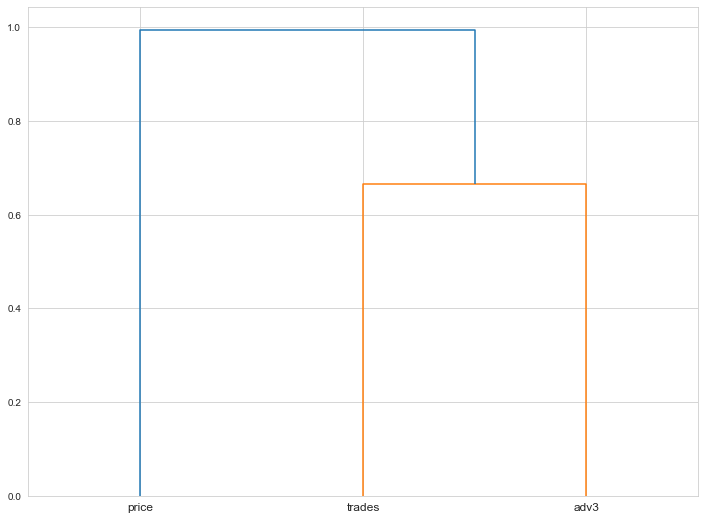

In [84]:
B=dendrogram(c_link_stocks,labels=list(X_stocks_df_cols_sym.columns))


etfs dendogram

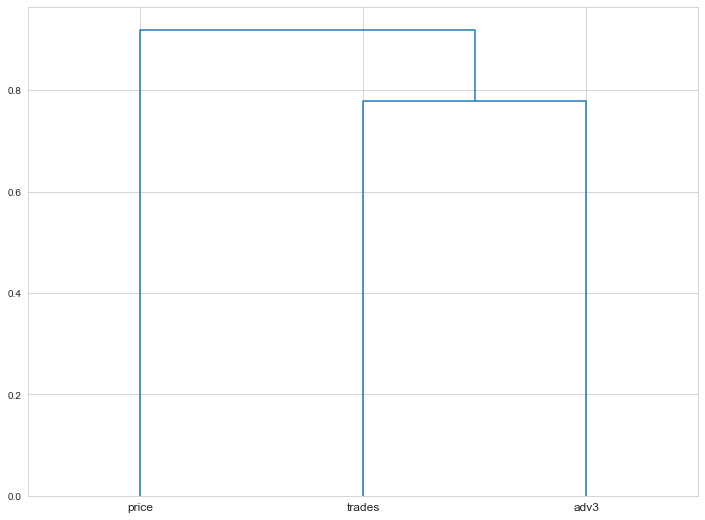

In [99]:
B=dendrogram(c_link_etfs,labels=list(X_etfs_df_cols_sym.columns))


In [85]:
class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'

        html += '</table>'

        return html
def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))
    
    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l
    
    return cluster_classes

In [86]:
def get_clust_graph(df, numclust, transpose=False, dataname=None, save=False, xticksize=8):
    if transpose==True:
        aml=df.transpose()
        xl="x-axis"
    else:
        aml=df
        xl="y-axis"
    data_dist = pdist(aml.transpose()) # computing the distance
    data_link = linkage(data_dist,  metric='correlation', method='complete')#method="complete") # computing the linkage
    B=dendrogram(data_link,labels=list(aml.columns),p=numclust, truncate_mode="lastp",get_leaves=True, count_sort='ascending', show_contracted=True)
    #myInd = [i for i, c in zip(B['ivl'], B['color_list']) if c=='g']
    get_cluster_classes(B)
    ax=plt.gca()
    ax.tick_params(axis='x', which='major', labelsize=xticksize)
    ax.tick_params(axis='y', which='major', labelsize=15)
    plt.xlabel(xl)
    #plt.set_size_inches(18.5, 10.5)
    plt.ylabel('Distance')
    plt.suptitle(xl+" clustering for "+dataname, fontweight='bold', fontsize=16);
    if save:
        plt.savefig(str(df.index.name)+str(numclust)+"tr_"+str(transpose)+"dn_"+str(dataname)+save+'.png')
    else:
        print("Not saving")
    return get_cluster_classes(B)

In [87]:
def give_cluster_assigns(df, numclust, tranpose=True):
    if transpose==True:
        data_dist = pdist(df.transpose())
        data_link = linkage(data_dist,  metric='correlation', method='complete')
        cluster_assigns=pd.Series(sch.fcluster(data_link, numclust, criterion='maxclust', monocrit=None), index=df.columns)
    else:
        data_dist = pdist(df)
        data_link = linkage(data_dist,  metric='correlation', method='complete')
        cluster_assigns=pd.Series(sch.fcluster(data_link, numclust, criterion='maxclust', monocrit=None), index=df.index)
    for i in arange(1,numclust+1):
        print("Cluster ",str(i),": ( N =",len(cluster_assigns[cluster_assigns==i].index),")", ", ".join(list(cluster_assigns[cluster_assigns==i].index)))

In [119]:
def custom_give_cluster_assigns(df, numclust, tranpose=True):
    
    if transpose==True:
        data_dist = pdist(df.transpose())
        data_link = linkage(data_dist,  metric='correlation', method='complete')
        cluster_assigns=pd.Series(sch.fcluster(data_link, numclust, criterion='maxclust', monocrit=None), index=df.columns)
    else:
        data_dist = pdist(df)
        data_link = linkage(data_dist,  metric='correlation', method='complete')
        cluster_assigns=pd.Series(sch.fcluster(data_link, numclust, criterion='maxclust', monocrit=None), index=df.index)
    return cluster_assigns


Not saving


C1,"['TSLA', 'AAPL', 'AMZN']"
C2,"['NIO', '(2)', '(2)', 'ZM', 'NVDA', 'AMD', 'WMT', '(2)', '(3)', 'BA', 'MRNA', '(2)', '(3)', 'JNJ', 'V', 'PYPL', '(3)', '(3)', '(4)', '(3)', '(6)', '(5)', '(8)', '(3)', 'BIDU', 'PDD', 'JPM', '(2)', '(2)', 'TSM', '(2)', '(2)', '(6)', '(12)', '(13)', '(6)', '(7)', '(7)', '(12)', '(8)', '(12)', '(2)', '(31)', '(41)', '(54)', 'WMT']"
C3,"['NVR', 'SEB', 'GOOGL', 'GOOG', 'SHOP', 'BKNG', 'CABO', 'MELI', 'CMG', 'BYND', 'SBUX', 'COST', 'NFLX', 'ROKU', 'ADBE', 'TDOC', '(2)', '(2)', '(2)', '(3)', 'GS', '(2)', '(5)', '(6)', '(2)', '(3)', 'RCL', '(2)', '(2)', '(5)', '(7)', '(9)', '(3)', '(10)', '(14)', '(5)', '(7)', '(28)', '(59)', '(28)', '(345)', '(28)', 'RCL', 'TTD', 'MSTR', 'SHW', '(3)', 'TPL', 'CSGP', 'SAM', '(2)', 'MTD', 'AZO', 'NOW', 'LRCX', '(2)', 'TWLO', 'INTU', '(2)', '(2)', 'SPOT', '(3)', '(4)', '(4)', '(2)', '(11)', '(6)', '(19)', '(19)', '(28)', '(38)', '(2)', '(3)', 'WM', '(31)', '(233)', '(143)', '(2)', '(33)', '(64)', '(6)', '(143)', '(271)', '(2)', 'MKTX', '(2)', 'FCNCA', '(2)', '(3)', '(2)', '(2)', '(2)', '(3)', '(2)', '(6)', 'CHTR', 'STZ', '(9)', '(13)', '(7)', '(2)', '(9)', '(9)', '(17)', 'IIPR', '(3)', '(4)', '(2)', '(2)', '(3)', '(5)', '(4)', '(9)', '(3)', '(6)', '(3)', '(7)', 'DECK', '(6)', '(4)', '(7)', '(8)', '(22)', '(8)', '(28)', '(25)', '(35)', '(11)', '(358)', '(80)', '(2)', '(18)', '(46)', 'NBR', '(62)', '(28)', '(90)', '(324)', '(122)', '(319)', '(8)', '(20)', '(17)', '(38)', '(426)', '(1032)', '(260)', '(116)']"


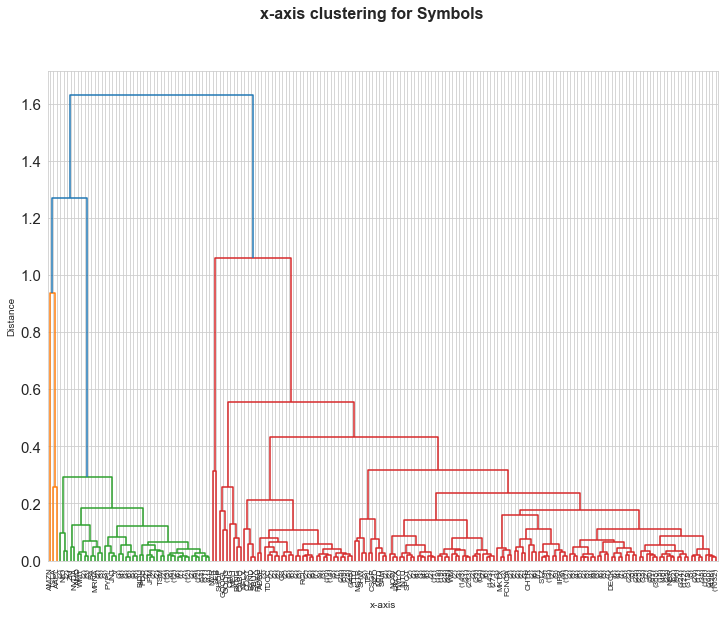

In [100]:
get_clust_graph(X_stocks_df_cols_sym, 193, transpose=True,dataname="Symbols")


#### Set the number of clusters i.e 10

In [114]:
give_cluster_assigns(X_stocks_df_cols_sym,4,tranpose=True)


Cluster  1 : ( N = 2 ) NVR, SEB
Cluster  2 : ( N = 5327 ) NFLX, GOOGL, BYND, SBUX, SHOP, COST, TGT, NKE, MMM, ROKU, TDOC, CRON, TOPS, MCD, RCL, SPOT, IBM, CHWY, NVAX, CRWD, PENN, NRZ, LMND, MA, UPS, TMUS, HYLN, TTD, FSLY, ADBE, ENPH, GOOG, CPE, LULU, TWLO, ATVI, WM, IIPR, SFIX, CAT, LMT, CODX, PLAY, CVNA, OKTA, SKT, HTBX, SDC, CMG, O, UA, MFA, AYTU, LAC, SBE, BIOC, WLL, BNTX, GRWG, UNH, IRM, BOXL, DOCU, GRPN, KHC, SNOW, OSTK, EA, INTU, NET, SPG, FUV, ETSY, VFF, D, DUK, INSG, RUN, PRTY, SNE, ALK, YETI, ABT, CZR, BE, CLSK, FVRR, TTWO, UONE, HD, SWBI, TRVN, INPX, NYMT, STZ, BUD, DASH, CRSR, DDOG, APXT, APPS, APPN, WTI, MARK, TTNP, DVAX, CRSP, SPI, OIS, CSPR, NBR, BIGC, APT, CIIC, CUK, WPG, FDX, APRN, AMCR, PLL, BEP, MAR, PK, NTEC, U, AXP, CRC, SONN, AGNC, AIM, UPWK, JKS, RAD, POLA, SIX, XPO, TWO, ADT, HPR, OXLC, CARA, AZO, LLNW, AI, SE, VUZI, GLUU, GPRO, EVRI, LIN, NVTA, WYNN, NAT, CHGG, GOGO, LOW, BORR, RRGB, CHFS, VLDR, ALLY, MAXR, KIRK, SELB, CHNR, PEI, OPGN, CLVS, QEP, DFS, ACI, SINT,

Not saving


C1,"['SOXL', '(2)', 'ONEQ', 'TECL', 'MDY', 'SOXX', 'JKH', 'IVV', 'QQQ', 'IWM', 'IXN', '(5)', 'DIA', 'IWO', '(2)', '(2)', '(2)', '(4)', '(5)', '(2)', '(3)', '(4)', 'SMH', '(2)', '(3)', '(2)', '(3)']"
C0,['SPY']
C2,"['SFY', 'VOO']"
C3,"['SQQQ', 'UVXY', 'XLF', 'SLV', 'XLE', 'VXX', 'EEM', 'TQQQ', 'HYG', 'EFA', 'GDX', 'EWZ', 'TZA', 'IAU', 'SPGM', 'AGG', 'GIGE', 'SFYF', 'TGIF', 'SFYX', 'VTI', 'GLD', 'XBI', '(2)', 'MTUM', '(3)', '(6)', 'ARKW', '(16)', '(6)', 'ARKK', 'XLK', '(7)', '(8)', '(9)', 'IWN', 'IWD', 'VIG', '(2)', '(2)', '(6)', '(15)', 'TLT', 'LQD', 'IYR', '(2)', 'SPXL', '(2)', 'XLV', 'JNK', 'TNA', 'IJR', 'EMB', 'IEF', 'ARKG', 'JNUG', 'VYM', 'TAN', '(3)', '(4)', '(15)', '(12)', '(17)', '(4)', 'VCIT', '(3)', '(3)', '(2)', '(2)', '(8)', '(6)', '(12)', '(2)', '(25)', 'QCLN', '(36)', '(21)', '(33)', 'USO', 'MJ', 'BND', 'VNQ', 'UCO', 'GUSH', 'SDOW', '(2)', 'FXI', 'VWO', 'VEA', 'XLU', 'IEMG', 'XLI', 'XLP', 'KRE', '(2)', 'GDXJ', 'NUGT', 'ARKF', 'FAS', '(3)', '(3)', '(4)', '(2)', '(2)', '(4)', '(44)', '(51)', '(4)', '(4)', '(2)', '(3)', '(4)', '(10)', '(9)', '(63)', '(102)', '(129)', '(2)', 'JETS', '(2)', 'SPXS', 'ICLN', 'JDST', '(2)', '(2)', '(2)', '(2)', '(3)', '(2)', '(2)', '(3)', '(3)', '(3)', '(7)', 'FAZ', '(3)', 'DFEN', '(2)', '(2)', '(3)', '(2)', '(2)', '(3)', '(25)', '(3)', '(4)', '(7)', '(5)', '(80)', '(7)', '(83)', '(3)', 'DFEN', 'SPHD', '(4)', '(9)', '(87)', '(146)', '(61)', '(4)', '(5)', '(14)', '(17)', '(158)', '(4)', '(269)', 'BND']"


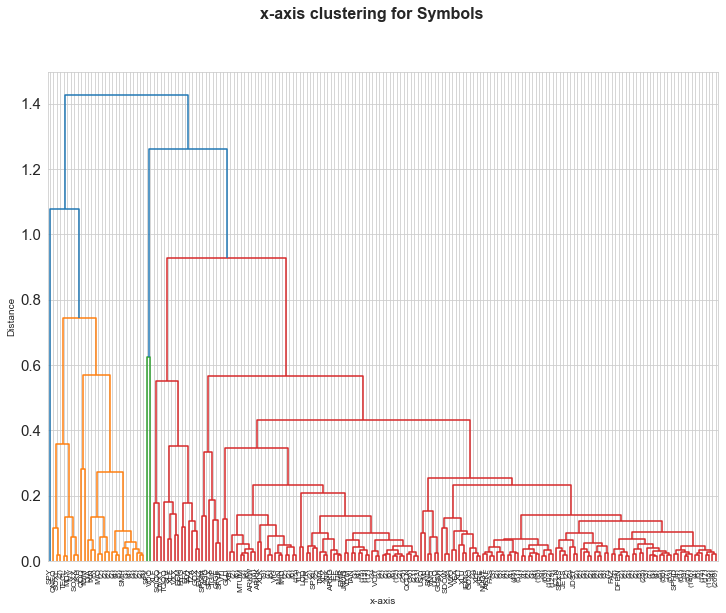

In [102]:
get_clust_graph(X_etfs_df_cols_sym, 193, transpose=True,dataname="Symbols")


#### Set the number of clusters i.e 10

In [103]:
give_cluster_assigns(X_etfs_df_cols_sym,10,tranpose=True)


Cluster  1 : ( N = 9 ) IVV, SOXL, TECL, SOXX, ONEQ, MDY, JKH, FBGX, FLGE
Cluster  2 : ( N = 43 ) FNGU, DIA, VGT, HIBL, VB, VUG, VOOG, SMH, MGK, VO, VHT, IWF, VCR, VBK, PALL, FDN, VOT, VONG, IGV, IGM, XITK, PNQI, IHI, IJH, IYT, IXN, IWO, IWV, RYT, XLG, IHF, FNGO, VIOG, IYH, RYH, VTWG, IWB, JKE, JKK, FRLG, JKG, RFG, JKD
Cluster  3 : ( N = 2 ) QQQ, IWM
Cluster  4 : ( N = 1 ) SPY
Cluster  5 : ( N = 1 ) SFY
Cluster  6 : ( N = 1 ) VOO
Cluster  7 : ( N = 3 ) SQQQ, UVXY, XLF
Cluster  8 : ( N = 11 ) TQQQ, TZA, IAU, SLV, VXX, XLE, GDX, HYG, EEM, EWZ, EFA
Cluster  9 : ( N = 6 ) SPGM, AGG, SFYX, GIGE, TGIF, SFYF
Cluster  10 : ( N = 1834 ) VTI, USO, GLD, MJ, BND, VNQ, UCO, VWO, GUSH, ARKK, VEA, JNUG, ICLN, SPXS, JETS, SPXL, POTX, VYM, THCX, ARKG, ERX, SDOW, SPHD, JDST, SPXU, NUGT, DFEN, HIBS, ARKF, ARKW, BETZ, SPYD, HERO, YOLO, TNA, TAN, DIG, REML, VIG, FAZ, SRET, NAIL, DRIP, LIT, NRGU, VT, BOTZ, ARKQ, SCHD, SDIV, SOXS, DRIV, UGA, QCLN, FAS, QDIV, SH, VXUS, XLK, SDS, UPRO, FIVG, CLOU, UDOW, SRTY, K

### 3D Plotting

In [151]:
cldata_etf=custom_give_cluster_assigns(X_etfs_df_cols_sym,10,tranpose=True)


In [152]:
cldata_etf = cldata.rename("cluster")

In [153]:
cldata_etf.head()

symbol
SFY     5
VOO     6
SPGM    9
AGG     9
SFYX    9
Name: cluster, dtype: int32

##### append cluster data to dataset

In [155]:
X_etf_cluster = X_etfs_transposed
X_etf_cluster = X_etf_cluster.append(cldata_etf, ignore_index=False)
X_etf_cluster = X_etf_cluster.transpose()
X_etf_cluster.head()


,trades,price,adv3,cluster
symbol,,,,
SFY,1.000000,0.020813,0.001186,5.0
VOO,0.755016,0.593245,0.046000,6.0
SPGM,0.511194,0.082853,0.000653,9.0
AGG,0.506209,0.190872,0.083899,9.0
SFYX,0.349872,0.019321,0.000172,9.0


In [156]:
## add symbol column
X_etf_cluster['symbol'] = X_etf_cluster.index
X_etf_cluster.head()

,trades,price,adv3,cluster,symbol
symbol,,,,,
SFY,1.000000,0.020813,0.001186,5.0,SFY
VOO,0.755016,0.593245,0.046000,6.0,VOO
SPGM,0.511194,0.082853,0.000653,9.0,SPGM
AGG,0.506209,0.190872,0.083899,9.0,AGG
SFYX,0.349872,0.019321,0.000172,9.0,SFYX


In [104]:

import plotly.express as px


In [161]:
fig = px.scatter_3d(X_etf_cluster.head(24), x='price', y='adv3', z='trades',
              color='cluster', symbol='symbol')
fig.show()

## WHEN I TRIED TO PLOT ALL OF THEM, THE COMPUTER STARTED TAKING TOO LONG SO I JUST PLOTTED 20